
Column Names in CSV: ['Project_ID', 'Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth', 'Weather_Index', 'Construction_Cost']

Updated Column Names: ['project_id', 'building_height', 'material_quality_index', 'labor_cost', 'concrete_strength', 'foundation_depth', 'weather_index', 'construction_cost']

Multiple Regression Equation:
Construction Cost = 27.35 + (49.86 * building_height) + (0.53 * labor_cost) + (20.58 * concrete_strength) + (31.62 * foundation_depth)

Most Influential Variable: building_height (49.86)

Model Performance:
Mean Squared Error (MSE): 550.64
R-squared (R²): 1.00


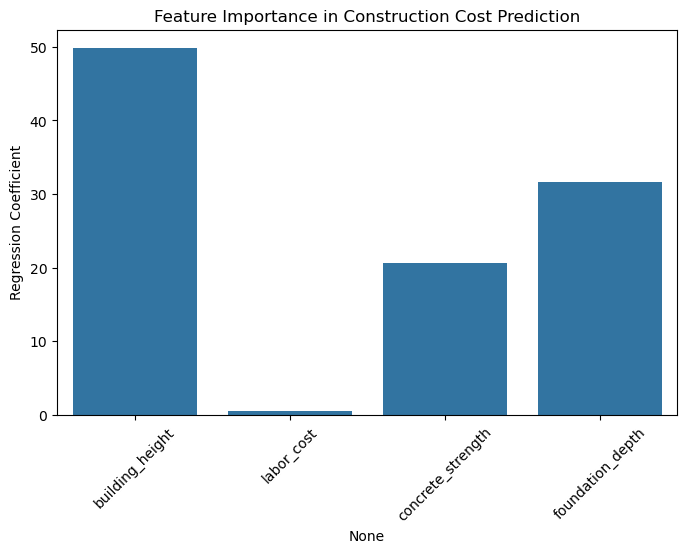

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Print column names to check for mismatches
print("\nColumn Names in CSV:", df.columns.tolist())

# Standardizing column names (removes spaces, converts to lowercase, replaces special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Print updated column names
print("\nUpdated Column Names:", df.columns.tolist())

# Select the actual column names based on the printed output
X_columns = ['building_height', 'material_quality', 'labor_cost', 'concrete_strength', 'foundation_depth']

# Check which columns exist in the dataset
X_columns = [col for col in X_columns if col in df.columns]

# Ensure the dependent variable exists
if 'construction_cost' not in df.columns:
    raise KeyError("Column 'construction_cost' not found in dataset!")

# Define independent (X) and dependent (y) variables
X = df[X_columns]
y = df['construction_cost']

# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the regression equation
equation = f"Construction Cost = {intercept:.2f}"
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.2f} * {feature})"

print("\nMultiple Regression Equation:")
print(equation)

# Identify the variable with the highest impact (absolute highest coefficient)
max_impact_feature = X.columns[np.argmax(np.abs(coefficients))]
max_impact_value = coefficients[np.argmax(np.abs(coefficients))]

print(f"\nMost Influential Variable: {max_impact_feature} ({max_impact_value:.2f})")

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=coefficients)
plt.xticks(rotation=45)
plt.ylabel("Regression Coefficient")
plt.title("Feature Importance in Construction Cost Prediction")
plt.show()
